2) Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using 
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import warnings
warnings.filterwarnings("ignore") #Never display warnings which match

In [4]:
np.random.seed(42)
fake = Faker()

Creating the Dataset of Student Academic Performance

In [5]:
num_students = 75
students_data = {'Student_ID': np.arange(1,num_students+1),
                 'Name': [fake.name() for _ in range(num_students)],
                }

Scores_data = {'Student_ID': np.arange(1, num_students + 1),
               'DS_Score': np.random.randint(0, 100, size=num_students),
               'AI_Score': np.random.randint(0, 100, size=num_students),
               'CC_Score': np.random.randint(0, 100, size=num_students),
               'CS_Score': np.random.randint(0, 100, size=num_students),
                }

df = pd.DataFrame(students_data).merge(pd.DataFrame(Scores_data), on='Student_ID')


In [6]:
#Adding Null Values
subjects = ['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']
for subject in subjects:
    df.loc[df.sample(frac=0.1).index, subject] = np.nan 

In [7]:
outlier_fraction = 0.1  
outliers_indices = df.sample(frac=outlier_fraction).index
for subject in ['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']:
    df.loc[outliers_indices, subject] = np.random.randint(150, 200, size=len(outliers_indices))

In [8]:
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score
0,1,Michael Davis,51.0,3.0,26.0,91.0
1,2,Sarah Cain,NaN,53.0,8.0,53.0
2,3,Heather Hodges,14.0,NaN,78.0,86.0
3,4,Heather Cochran,71.0,62.0,14.0,95.0
4,5,Susan Faulkner,60.0,17.0,89.0,96.0
...,...,...,...,...,...,...
70,71,Danielle Dennis,181.0,185.0,163.0,161.0
71,72,Brandon Matthews,3.0,NaN,80.0,8.0
72,73,Mark Casey,1.0,4.0,58.0,98.0
73,74,Wendy Grimes,5.0,89.0,1.0,18.0


Understanding the Dataset

In [9]:
df.shape

(75, 6)

In [10]:
df.columns

Index(['Student_ID', 'Name', 'DS_Score', 'AI_Score', 'CC_Score', 'CS_Score'], dtype='object')

In [11]:
df.describe()

,Student_ID,DS_Score,AI_Score,CC_Score,CS_Score
count,75.000000,68.000000,68.000000,68.000000,69.000000
mean,38.000000,62.514706,63.397059,63.205882,64.927536
std,21.794495,51.793359,51.041435,51.924905,45.804353
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.500000,27.500000,26.500000,26.000000,31.000000
50%,38.000000,55.500000,56.000000,58.000000,58.000000
75%,56.500000,77.500000,85.250000,85.500000,89.000000
max,75.000000,198.000000,196.000000,198.000000,180.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  75 non-null     int32  
 1   Name        75 non-null     object 
 2   DS_Score    68 non-null     float64
 3   AI_Score    68 non-null     float64
 4   CC_Score    68 non-null     float64
 5   CS_Score    69 non-null     float64
dtypes: float64(4), int32(1), object(1)
memory usage: 5.9+ KB


Checking for Null/Missing Values

In [13]:
df.isnull().sum()

Student_ID    0
Name          0
DS_Score      7
AI_Score      7
CC_Score      7
CS_Score      6
dtype: int64

In [14]:
#Handling Missing Values
df.fillna(df.mean(),inplace=True)

In [15]:
df.isnull().sum()

Student_ID    0
Name          0
DS_Score      0
AI_Score      0
CC_Score      0
CS_Score      0
dtype: int64

Checking For Outliers

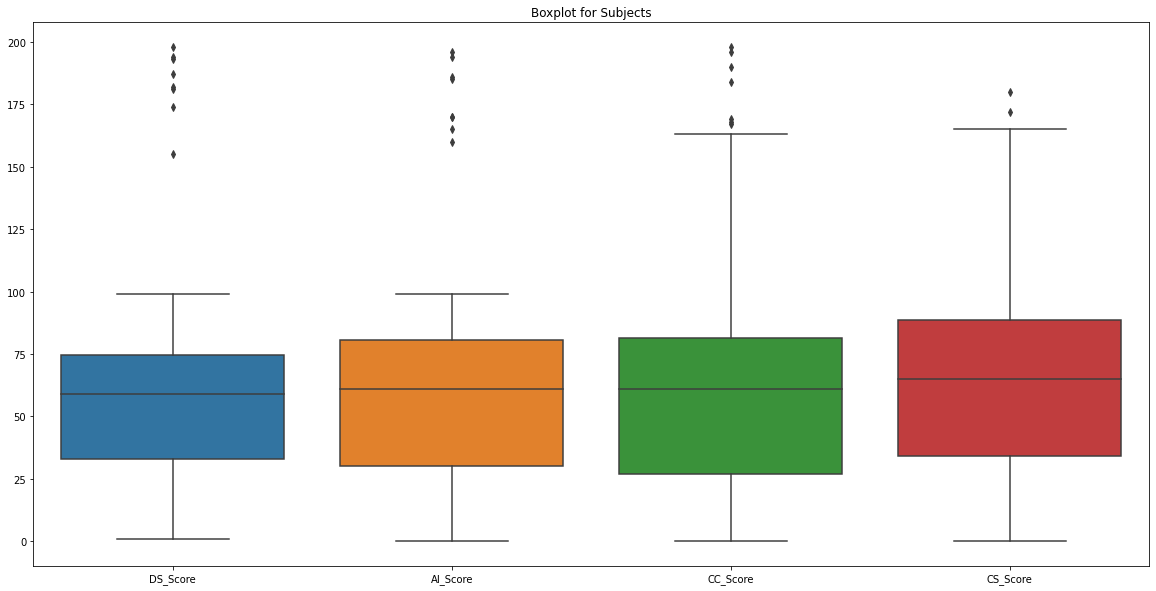

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']])
plt.title('Boxplot for Subjects')
plt.show()

In [17]:
#Finding total outliers in all columns
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers_df = df.select_dtypes(include=np.number).apply(find_outliers)
sum_of_outliers = outliers_df.sum()
print("Sum of outliers in each column:")
print(sum_of_outliers)

Sum of outliers in each column:
Student_ID    0
DS_Score      8
AI_Score      8
CC_Score      7
CS_Score      2
dtype: int64


In [18]:
#Old Shape of Dataset
df.shape

(75, 6)

In [19]:
#Removing Outliers
df = df.loc[~outliers_df.any(axis=1)]

In [20]:
#New Shape of Dataset
df.shape

(67, 6)

In [21]:
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score
0,1,Michael Davis,51.000000,3.000000,26.0,91.0
1,2,Sarah Cain,62.514706,53.000000,8.0,53.0
2,3,Heather Hodges,14.000000,63.397059,78.0,86.0
3,4,Heather Cochran,71.000000,62.000000,14.0,95.0
4,5,Susan Faulkner,60.000000,17.000000,89.0,96.0
...,...,...,...,...,...,...
69,70,Dean Perez,35.000000,77.000000,2.0,36.0
71,72,Brandon Matthews,3.000000,63.397059,80.0,8.0
72,73,Mark Casey,1.000000,4.000000,58.0,98.0
73,74,Wendy Grimes,5.000000,89.000000,1.0,18.0


Data Transformation

In [22]:
#Changing datatype of float columns to round off integer type
float_columns = ['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']
df[float_columns] = df[float_columns].round().astype(int)

In [23]:
#Adding extra Column
total_marks = 400  # Setting the total marks for 4 subjects
df['Total'] = df[['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']].sum(axis=1)

In [24]:
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score,Total
0,1,Michael Davis,51,3,26,91,171
1,2,Sarah Cain,63,53,8,53,177
2,3,Heather Hodges,14,63,78,86,241
3,4,Heather Cochran,71,62,14,95,242
4,5,Susan Faulkner,60,17,89,96,262
...,...,...,...,...,...,...,...
69,70,Dean Perez,35,77,2,36,150
71,72,Brandon Matthews,3,63,80,8,154
72,73,Mark Casey,1,4,58,98,161
73,74,Wendy Grimes,5,89,1,18,113


In [25]:
#Converting the 'Total' column to a SGPA column to change the scale
df['SGPA'] = (df['Total'] / total_marks) * 10
df['SGPA'] = df['SGPA'].round(1)

In [26]:
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score,Total,SGPA
0,1,Michael Davis,51,3,26,91,171,4.3
1,2,Sarah Cain,63,53,8,53,177,4.4
2,3,Heather Hodges,14,63,78,86,241,6.0
3,4,Heather Cochran,71,62,14,95,242,6.0
4,5,Susan Faulkner,60,17,89,96,262,6.6
...,...,...,...,...,...,...,...,...
69,70,Dean Perez,35,77,2,36,150,3.8
71,72,Brandon Matthews,3,63,80,8,154,3.8
72,73,Mark Casey,1,4,58,98,161,4.0
73,74,Wendy Grimes,5,89,1,18,113,2.8


Data Normalization and Skewness

In [27]:
#Checking skewness of Original variable and Transformed variable
from scipy import stats

total_data = df['Total']

skewness_before = stats.skew(total_data)
print("Skewness Before Transformation = ",skewness_before)

transformed_data,lamda_value = stats.boxcox(total_data)
skewness_after = stats.skew(transformed_data)
print("Skewness After Transformation = ",skewness_after)

Skewness Before Transformation =  -0.16316809394169834
Skewness After Transformation =  -0.07582507406787861


Text(0.5, 1.0, 'Transformed Distribution (Skewness: -0.08)')

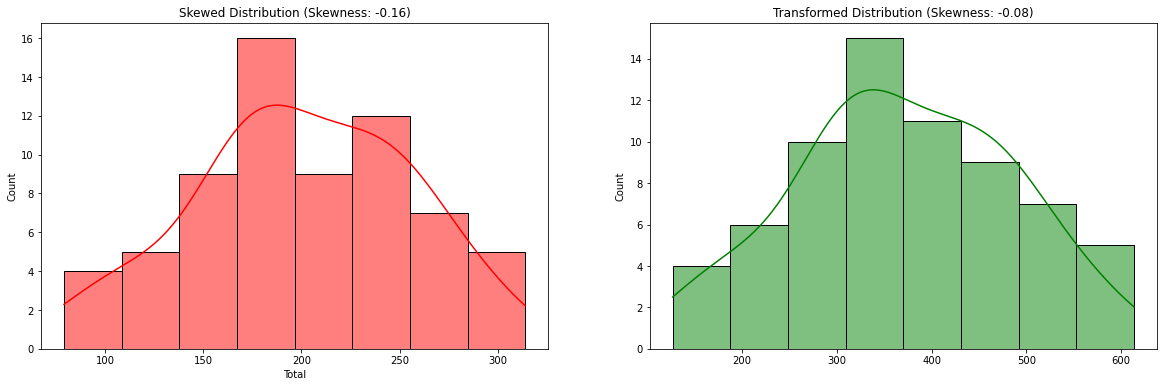

In [28]:
#Plotting the Skewness
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(total_data, kde=True , color= 'red')
plt.title(f'Skewed Distribution (Skewness: {skewness_before:.2f})')


plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, color= 'green')
plt.title(f'Transformed Distribution (Skewness: {skewness_after:.2f})')